In [25]:
import numpy as np
from collections import defaultdict
import networkx as nx
import time
import subprocess
from subprocess import Popen, PIPE, STDOUT, run
import  matplotlib.pyplot as plt

In [2]:
exe_file_name = "exp_cpp"
exe_cmd = "./" + exe_file_name

In [3]:
def generate1(n, k, p=0.5):
    T = nx.generators.trees.random_tree(n, int(time.time()))
    print(T.edges)
    print(n, k)
    for e in T.edges:
        print(e[0], e[1])
    #nx.draw(T,with_labels=True)
    print()
    nx.draw(T, with_labels=True)

In [4]:
def str_tc(n, k):
    T = nx.generators.trees.random_tree(n, int(time.time()))
    # print(T.edges)
    tc = ""
    tc += str(n) + " " + str(k)
    for a, b in T.edges:
        tc += " " + str(a) + " " + str(b)
    return tc

In [5]:
p = run([exe_cmd], stdout=PIPE,
        input=str_tc(100,2), encoding='ascii')
ans, t= map(int,p.stdout.split())
print(ans, t)
type(ans)

12 174


int

In [6]:
def run1(n, k):
    p = run([exe_cmd], stdout=PIPE, input=str_tc(n,k), encoding='ascii')
    ans, t= map(int,p.stdout.split())
    return ans, t

In [21]:
range_n = 100
range_split = 10
exp_time = 10
dat = np.zeros((range_n//range_split+1, range_n//range_split+1, exp_time))
for exp_n in range(1,range_n+1, range_split):
    for exp_k in range(1, exp_n+1, range_split):
        for ti in range(exp_time):
            ans, tt = run1(exp_n, exp_k)
            dat[exp_n//range_split][exp_k//range_split][ti] = tt

In [48]:
def exp(range_n=100, range_split=10, exp_time=10):
    dat = np.zeros((range_n//range_split+1, range_n//range_split+1, exp_time))
    for exp_n in range(1,range_n+1, range_split):
        for exp_k in range(1, exp_n+1, range_split):
            for ti in range(exp_time):
                ans, tt = run1(exp_n, exp_k)
                dat[exp_n//range_split][exp_k//range_split][ti] = tt
    return dat

In [49]:
dat2 = exp(1000,100,5)

In [33]:
dats = dat.sum(axis = 2)
dats

array([[  276.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.],
       [  336.,   673.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.],
       [  485.,  1210.,  2037.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.],
       [  604.,  1703.,  2985.,  4225.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.],
       [  629.,  1978.,  3296.,  4984.,  7657.,     0.,     0.,     0.,
            0.,     0.,     0.],
       [  812.,  2768.,  4674.,  6917.,  9593., 12066.,     0.,     0.,
            0.,     0.,     0.],
       [  964.,  3307.,  5791.,  8622., 11272., 14345., 17778.,     0.,
            0.,     0.,     0.],
       [ 1031.,  3875.,  6535.,  9751., 13162., 16467., 20537., 24318.,
            0.,     0.,     0.],
       [ 1155.,  3883.,  6924.,  9777., 13233., 16903., 20842., 25041.,
        30380.,     0.,     0.],
       [ 1215.,  4418.,  8063., 12102., 16458., 20936.,

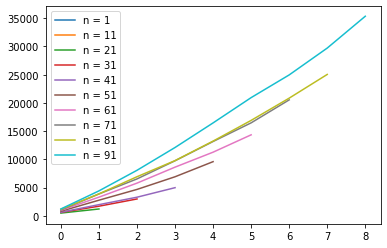

In [47]:
for i in range(range_n//range_split):
    plt.plot(dats[i][:i], label=("n = " + str(i*range_split+1)))
plt.legend()

In [109]:
def show_stat(dat, range_n, range_split):
    dats = dat.sum(axis=2)
    #print(dats)
    
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    for i in range(range_n//range_split):
        ax1.set_title("n-k graph")
        ax1.plot(dats[i][:i], label=("n = " + str(i*range_split+1)))
        ax1.legend()
        
    for i in range(range_n//range_split):
        #print(i, dats.T[i][i:-1])
        ax2.set_title("k-n graph")
        ax2.plot((dats.T[i][i:-1]), label=("k = " + str(i*range_split+1)))
        ax2.legend()
    

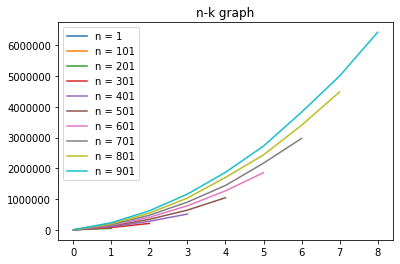

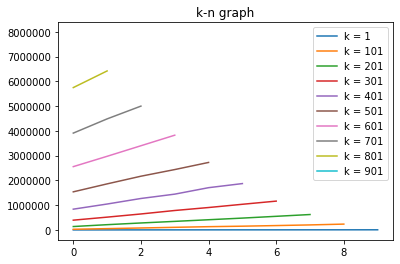

In [110]:
show_stat(dat2, 1000, 100)